In [3]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

# The purpose of this notebook is to varify reduced SVM. See benchmark session of https://www.overleaf.com/project/5fd197ca13a41fea4be0760c

In [4]:
from classifiers.convex.svm import BinarySVM
from classifiers.datasets.dataloader import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from classifiers.datasets.datascaler import DataMultiScaler, DataScaler
from classifiers.kernel import Kernel
from classifiers.visualization import Plot_SVM, Plot_Data, Plot_Log_From_SPSA
from sklearn.datasets import load_breast_cancer, make_circles, make_moons
import numpy as np 
from matplotlib import pyplot as plt 


# Reduced SVM vs Reduced QASVM

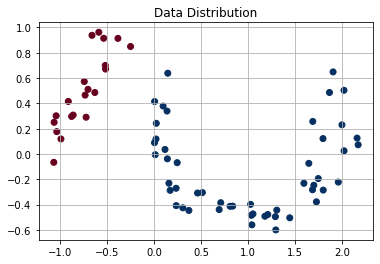

In [7]:
np.random.seed(10)
dl = Toy2DLinearLoader(w=(.1, -.1), b=0)
X, y = dl(num_data=100, noise=5)
X, y = make_moons(100, noise=0.1, shuffle=False)
X = X[30:]
y= y[30:]
ds = DataScaler('standard', with_std=False)
Plot_Data(X, y).plot()

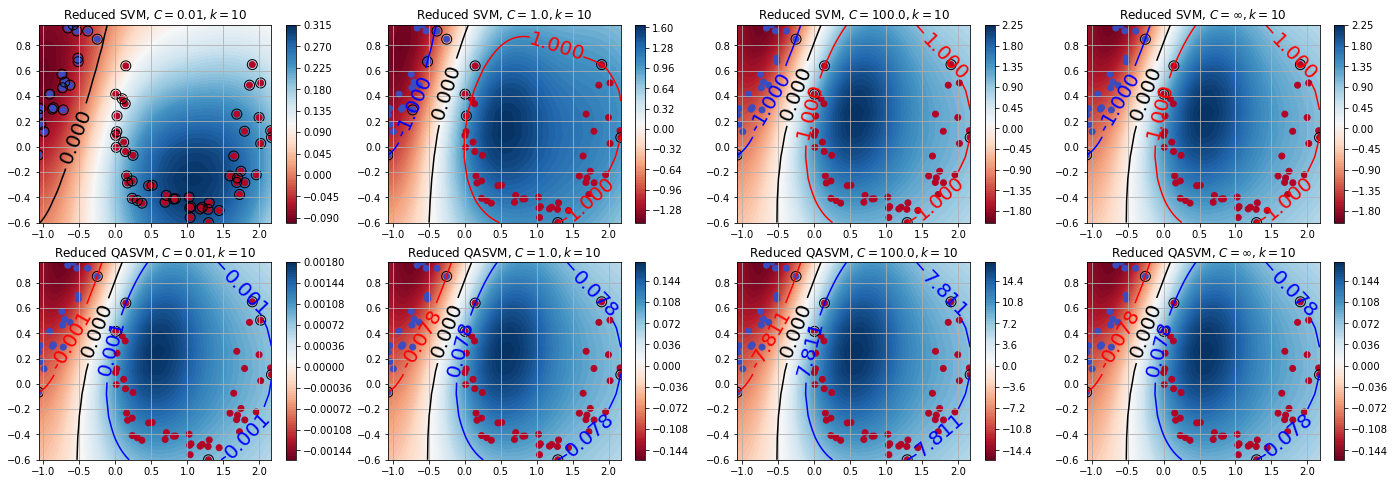

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
c_vals = [1e-2, 1e0, 1e2, None]
for c, ax in zip(c_vals, axes[0,:]):
    svm = BinarySVM(Kernel('RBF'), C=c, k=10, mutation='REDUCED_SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    c='\infty' if c is None else c
    ax.set_title(f'Reduced SVM, $C={c}, k=10$')
for c, ax in zip(c_vals, axes[1,:]):
    svm = BinarySVM(Kernel('RBF'), C=c, k=10, mutation='REDUCED_QASVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={'c1':'b', 0:'k', 'c2':'r'})
    c='\infty' if c is None else c
    ax.set_title(f'Reduced QASVM, $C={c}, k=10$')
plt.savefig('./figs/reduced__svm_vs_qasvm.png')

0.08908889298620604
0.08949084026747599
0.09230183080689607
0.09968161592813163
0.1033094754396639


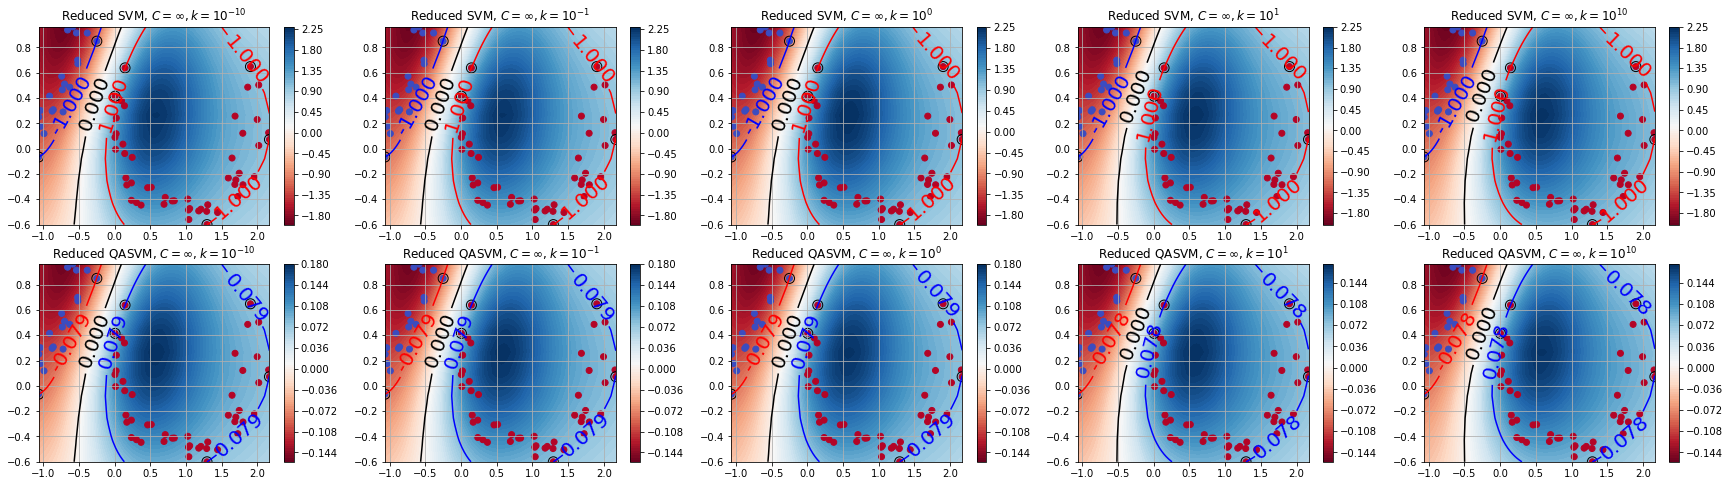

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(30, 8))
k_vals = [1e-10, 1e-1, 1e0, 1e1, 1e10]
for k, ax in zip(k_vals, axes[0,:]):
    svm = BinarySVM(Kernel('RBF'), C=None, k=k, mutation='REDUCED_SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    c='\infty' if c is None else c
    ax.set_title('Reduced SVM, $C=\infty, k=10^{'+str(int(np.log10(k)))+'}$')
for k, ax in zip(k_vals, axes[1,:]):
    svm = BinarySVM(Kernel('RBF'), C=None, k=k, mutation='REDUCED_QASVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={'c1':'b', 0:'k', 'c2':'r'})
    c='\infty' if c is None else c
    ax.set_title('Reduced QASVM, $C=\infty, k=10^{'+str(int(np.log10(k)))+'}$')
    print(sum(svm.alpha*svm.polary*np.exp(-1*np.linalg.norm(X, axis=1)**2)))
plt.savefig('./figs/distance_based_kernel_is_robust_on_k.png')

In [11]:
svm.b*k

0.06810320940934764

In [16]:
np.linalg.norm(X, axis=1)

array([0.99202186, 0.88605887, 1.12829542, 0.87198604, 1.06067415,
       1.14798113, 0.84763708, 0.79711764, 0.93906852, 0.87021761,
       0.87012979, 1.00401173, 0.92760663, 0.91557205, 0.78089816,
       1.08639747, 1.09380451, 1.05161042, 0.99938202, 1.07034297,
       0.6542419 , 0.39017967, 0.36537934, 0.41470251, 0.24341729,
       0.11978512, 0.08939516, 0.1196717 , 0.01217607, 0.14462616,
       0.25328889, 0.27869424, 0.35688445, 0.33312127, 0.47019853,
       0.52284461, 0.57865124, 0.59554615, 0.55424867, 0.80516578,
       0.8181578 , 0.93009094, 0.90622392, 1.09899262, 1.17971414,
       1.14066532, 1.1516247 , 1.27527905, 1.29886648, 1.37985724,
       1.37637293, 1.42495487, 1.52666043, 1.70646499, 1.71479919,
       1.60817244, 1.76525558, 1.81933155, 1.6452821 , 1.75490821,
       1.96944921, 1.79840051, 2.16935123, 2.01842042, 2.16023094,
       1.70521845, 2.0090852 , 2.07940837, 1.92537522, 2.00911392])